<a href="https://colab.research.google.com/github/Thiruvikramchoudry/Chatbot-Pulse/blob/master/pulse_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Importing required libraries
import numpy as np # linear algebra
import pandas as pd

In [24]:
data = pd.read_csv("hmnist_28_28_RGB.csv")


In [25]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173.0,124.0,138.0,183.0,147.0,166.0,185.0,154.0,177.0,2.0
1,25,14,30,68,48,75,123,93,126,158,...,60.0,39.0,55.0,25.0,14.0,28.0,25.0,14.0,27.0,2.0
2,192,138,153,200,145,163,201,142,160,206,...,167.0,129.0,143.0,159.0,124.0,142.0,136.0,104.0,117.0,2.0
3,38,19,30,95,59,72,143,103,119,171,...,44.0,26.0,36.0,25.0,12.0,17.0,25.0,12.0,15.0,2.0
4,158,113,139,194,144,174,215,162,191,225,...,209.0,166.0,185.0,172.0,135.0,149.0,109.0,78.0,92.0,2.0


In [26]:
meta_df = pd.read_csv("HAM10000_metadata (1).csv")
meta_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [27]:
meta_df.shape

(10015, 7)

In [28]:
data.shape

(1248, 2353)

In [29]:
data.describe

<bound method NDFrame.describe of       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0           192        153        193        195        155        192   
1            25         14         30         68         48         75   
2           192        138        153        200        145        163   
3            38         19         30         95         59         72   
4           158        113        139        194        144        174   
...         ...        ...        ...        ...        ...        ...   
1243        213        177        202        214        181        205   
1244        127        105         95        137        113         99   
1245        139        108         95        149        119        112   
1246        188        152        160        189        154        159   
1247        200        163        196        202        164        191   

      pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  

In [38]:
data.isnull().sum()
#1248

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel2348    1
pixel2349    1
pixel2350    1
pixel2351    1
label        1
Length: 2353, dtype: int64

In [39]:
data.dropna(inplace=True)

In [40]:
data.isnull().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel2348    0
pixel2349    0
pixel2350    0
pixel2351    0
label        0
Length: 2353, dtype: int64

In [41]:
yData = data['label']
XData = data.drop(columns = ['label'])

In [42]:
distribution = meta_df['dx'].value_counts()
distribution

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [43]:
dist = data['label'].value_counts()
dist

2.0    1094
3.0     115
6.0      36
4.0       2
Name: label, dtype: int64

<Axes: >

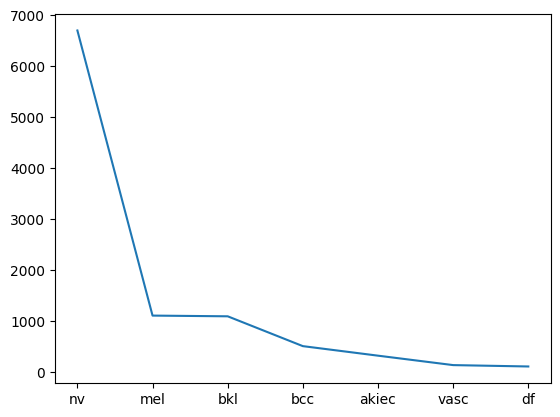

In [44]:
distribution.plot()

In [46]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
XData,yData  = sampler.fit_resample(XData,yData)
XData.shape, yData.shape


((4376, 2352), (4376,))

In [47]:
XData = np.array(XData).reshape((-1, 28, 28, 3))
XData = XData / 255
XData.shape

(4376, 28, 28, 3)

In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(XData,yData, test_size=0.2)
Xtrain.shape, Xtest.shape

((3500, 28, 28, 3), (876, 28, 28, 3))

In [49]:
print(Xtrain)

[[[[0.77254902 0.4627451  0.61960784]
   [0.78431373 0.47058824 0.62745098]
   [0.78823529 0.44313725 0.64313725]
   ...
   [0.85490196 0.52941176 0.71764706]
   [0.83529412 0.48235294 0.69019608]
   [0.83921569 0.50196078 0.70980392]]

  [[0.77254902 0.43921569 0.56470588]
   [0.77647059 0.44705882 0.56470588]
   [0.79607843 0.45098039 0.62352941]
   ...
   [0.86666667 0.57254902 0.76470588]
   [0.85490196 0.5372549  0.72941176]
   [0.84705882 0.51372549 0.70980392]]

  [[0.76078431 0.40784314 0.52156863]
   [0.78039216 0.43921569 0.5372549 ]
   [0.80392157 0.45098039 0.58823529]
   ...
   [0.8745098  0.58431373 0.76078431]
   [0.86666667 0.54509804 0.72941176]
   [0.86666667 0.55294118 0.75294118]]

  ...

  [[0.77254902 0.49803922 0.60392157]
   [0.80392157 0.51764706 0.65882353]
   [0.83137255 0.58431373 0.71764706]
   ...
   [0.87058824 0.67843137 0.81960784]
   [0.85098039 0.61176471 0.74509804]
   [0.85098039 0.63529412 0.78039216]]

  [[0.78039216 0.50588235 0.64705882]
   [0.8

In [50]:
#Training the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf

img_width, img_height = 28,28

In [51]:
input_shape = (img_width, img_height, 3)
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('swish'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))

In [52]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer='nadam',
metrics=['accuracy'])

In [53]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [54]:
history = model.fit(Xtrain,
                    Ytrain,
                    epochs = 100,
                    validation_data = (Xtest, Ytest),
                    callbacks=[callback, early_stopping])

Epoch 1/100
108/110 [============================>.] - ETA: 0s - loss: 1.4611 - accuracy: 0.2975
Epoch 1: saving model to best_model.h5
110/110 [==============================] - 9s 38ms/step - loss: 1.4591 - accuracy: 0.2986 - val_loss: 1.1421 - val_accuracy: 0.4521
Epoch 2/100
109/110 [============================>.] - ETA: 0s - loss: 1.0741 - accuracy: 0.5252
Epoch 2: saving model to best_model.h5
110/110 [==============================] - 4s 35ms/step - loss: 1.0747 - accuracy: 0.5246 - val_loss: 0.8404 - val_accuracy: 0.6507
Epoch 3/100
109/110 [============================>.] - ETA: 0s - loss: 0.7912 - accuracy: 0.6674
Epoch 3: saving model to best_model.h5
110/110 [==============================] - 5s 47ms/step - loss: 0.7914 - accuracy: 0.6674 - val_loss: 0.6558 - val_accuracy: 0.7123
Epoch 4/100
109/110 [============================>.] - ETA: 0s - loss: 0.6497 - accuracy: 0.7122
Epoch 4: saving model to best_model.h5
110/110 [==============================] - 4s 35ms/step - lo

In [55]:
model.evaluate(Xtrain, Ytrain)

110/110 [==============================] - 1s 12ms/step - loss: 0.0099 - accuracy: 0.9983


[0.009873811155557632, 0.998285710811615]

In [ ]:
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2

In [ ]:
!pip install google.colab
from google.colab.patches import cv2_imshow

In [ ]:
model = tf.keras.models.load_model('/content/best_model (1).h5')

img = cv2.imread('ISIC_0024306.jpg')
cv2_imshow(img)
img = cv2.resize(img, (28, 28))
result = model.predict(img.reshape(1, 28, 28, 3))
max_prob = max(result[0])
class_ind = list(result[0]).index(max_prob)
print(class_ind)



In [ ]:
df = pd.DataFrame([flattened_array], columns=[f'pixel{i:04d}' for i in range(len(flattened_array))])



In [ ]:
input_data = df.to_numpy()
print(input_data)

In [ ]:
# Reshape the input data to match the grayscale image shape

input_data=input_data
XData = input_data.reshape((-1, 28, 28, 3))
XData = XData / 255.0  # Normalize the input data

In [ ]:
# Pass the input to the model for prediction
predictions = model.predict(XData)

# Interpret the output
# Assuming the model is a classification model, you can extract the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print the predicted labels

#0029301

classes = {4: ' melanocytic nevi', 6:  'melanoma', 2 :'benign keratosis-like lesions', 1: ' basal cell carcinoma', 5: ' pyogenic granulomas and hemorrhage', 0:  'Actinic keratoses and intraepithelial carcinomae',  3:  'dermatofibroma'}
print(classes[predicted_labels[0]])

In [ ]:
print(28*28*3)